In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

t_data = ['신문 전자 삼성 전자 주식 신문', '삼성 신문', '한화 신문', '기록 신문']
tk = Tokenizer()
tk.fit_on_texts(t_data)
tk.word_index

{'신문': 1, '전자': 2, '삼성': 3, '주식': 4, '한화': 5, '기록': 6}

In [2]:
tk.texts_to_matrix(t_data)

array([[0., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1.]])

In [3]:
tk.texts_to_matrix(t_data, mode = 'count')

array([[0., 2., 2., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1.]])

In [4]:
tk.texts_to_matrix(t_data, mode = 'tfidf')

array([[0.        , 0.99520933, 1.8601123 , 0.84729786, 1.09861229,
        0.        , 0.        ],
       [0.        , 0.58778666, 0.        , 0.84729786, 0.        ,
        0.        , 0.        ],
       [0.        , 0.58778666, 0.        , 0.        , 0.        ,
        1.09861229, 0.        ],
       [0.        , 0.58778666, 0.        , 0.        , 0.        ,
        0.        , 1.09861229]])

In [5]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
w_data = fetch_20newsgroups()
print(w_data.keys())
data = w_data.data

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [7]:
len(data)

11314

In [8]:
len(w_data.target_names)

20

In [9]:
X_data = w_data.data
Y_data = w_data.target

In [10]:
import numpy as np

np.unique(Y_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [11]:
len(np.unique(X_data))

11314

In [12]:
all_data = pd.DataFrame()
all_data['X'] = X_data
all_data['Y'] = Y_data
all_data

,X,Y
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [13]:
n_l = []
for i in X_data:
    n = len(i)
    n_l.append(n)

max(n_l), min(n_l)

(75154, 125)

In [14]:
type(X_data[0])

str

In [15]:
tk = Tokenizer(num_words = 10000)
tk.fit_on_texts(X_data)
len(tk.word_index)

134142

In [16]:
t_x_data = tk.texts_to_matrix(X_data)
t_x_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
t1_x_data = tk.texts_to_matrix(X_data, mode = 'count')
t1_x_data

array([[ 0.,  6.,  2., ...,  0.,  0.,  0.],
       [ 0.,  4.,  1., ...,  0.,  0.,  0.],
       [ 0., 21.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0., 12.,  1., ...,  0.,  0.,  0.],
       [ 0.,  3.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [18]:
t2_x_data = tk.texts_to_matrix(X_data, mode = 'tfidf')
t2_x_data

array([[0.        , 2.03303026, 1.26800369, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.73776026, 0.74890341, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.94532413, 2.09075818, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.53779767, 0.74890341, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.52826285, 1.26800369, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
Y_data = to_categorical(Y_data)
Y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
X_data1 = t_x_data
X_data2 = t1_x_data
X_data3 = t2_x_data

In [21]:
from sklearn.model_selection import train_test_split

# 단어 유무 특징을 갖는 data
t_x1, tt_x1, t_y1, tt_y1  = train_test_split(X_data1, Y_data, random_state = 1)

In [22]:
# 단어 빈도수를 특징으로 갖는 data
t_x2, tt_x2, t_y2, tt_y2  = train_test_split(X_data2, Y_data, random_state = 1)

In [23]:
# 단어 가중치를 특징으로 갖는 data
t_x3, tt_x3, t_y3, tt_y3  = train_test_split(X_data3, Y_data, random_state = 1)

In [24]:
w_all_data = pd.DataFrame(X_data3)
w_all_data['Y'] = w_data.target
w_all_data

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Y
0,0.0,2.033030,1.268004,1.600426,1.595462,0.0,0.000000,0.782792,1.687681,1.762122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,1.737760,0.748903,1.600426,1.287208,0.0,1.657382,0.782792,1.361610,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,2.945324,2.090758,2.129029,2.649386,0.0,2.060808,2.042648,2.476453,2.191043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,1.737760,0.748903,0.762612,0.760246,0.0,0.000000,0.782792,0.000000,0.839661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,2.145287,0.748903,0.762612,1.595462,0.0,1.337166,1.867973,0.804189,2.003678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,2.474434,2.306204,1.600426,2.710238,0.0,2.431994,1.642778,2.245102,2.191043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
11310,0.0,2.242528,0.748903,0.762612,2.341133,0.0,1.337166,0.782792,1.919032,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
11311,0.0,2.537798,0.748903,1.600426,1.983815,0.0,1.657382,1.642778,1.361610,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
11312,0.0,1.528263,1.268004,0.000000,2.122424,0.0,1.884580,1.867973,1.919032,2.003678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [26]:
t_x1.shape

(8485, 10000)

In [27]:
m = Sequential()
m.add(Dense(256, input_shape = (10000, ), activation = 'relu'))
m.add(Dropout(0.5))
m.add(Dense(128, activation = 'relu'))
m.add(Dropout(0.5))
m.add(Dense(20, activation = 'softmax'))
m.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hy = m.fit(t_x1, t_y1, epochs = 10, validation_data = (tt_x1, tt_y1))

Epoch 1/10
266/266 [==============================] - 12s 44ms/step - loss: 1.9321 - accuracy: 0.4372 - val_loss: 0.6959 - val_accuracy: 0.8476
Epoch 2/10
266/266 [==============================] - 8s 29ms/step - loss: 0.6400 - accuracy: 0.8205 - val_loss: 0.4224 - val_accuracy: 0.8879
Epoch 3/10
266/266 [==============================] - 7s 27ms/step - loss: 0.3332 - accuracy: 0.9113 - val_loss: 0.3816 - val_accuracy: 0.8968
Epoch 4/10
266/266 [==============================] - 7s 25ms/step - loss: 0.1882 - accuracy: 0.9512 - val_loss: 0.3674 - val_accuracy: 0.8986
Epoch 5/10
266/266 [==============================] - 6s 24ms/step - loss: 0.1403 - accuracy: 0.9678 - val_loss: 0.3717 - val_accuracy: 0.9039
Epoch 6/10
266/266 [==============================] - 7s 25ms/step - loss: 0.1116 - accuracy: 0.9744 - val_loss: 0.3795 - val_accuracy: 0.9035
Epoch 7/10
266/266 [==============================] - 7s 28ms/step - loss: 0.0959 - accuracy: 0.9765 - val_loss: 0.4101 - val_accuracy: 0.899

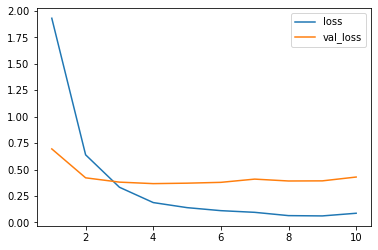

In [28]:
import matplotlib.pyplot as plt

ec = range(1, len(hy.history['accuracy']) + 1)
plt.plot(ec, hy.history['loss'], label = 'loss')
plt.plot(ec, hy.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [44]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### 데이터 수집

In [45]:
data = fetch_20newsgroups()
X_data = data.data
Y_data = data.target

### 데이터 전처리

In [51]:
def text_preprocessor(X_data, Y_data, mode):
    tk = Tokenizer(num_words = 10000)
    tk.fit_on_texts(X_data)
    X = tk.texts_to_matrix(X_data, mode = mode)
    Y = to_categorical(Y_data)
    t_x, tt_x, t_y, tt_y = train_test_split(X, Y)
    return t_x, tt_x, t_y, tt_y

### 모델 생성 및 학습

In [52]:
def text_classifier(t_all):
    m = Sequential()
    m.add(Dense(256, input_shape = (10000, ), activation = 'relu'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation = 'relu'))
    m.add(Dropout(0.5))
    m.add(Dense(20, activation = 'softmax'))
    m.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    hy = m.fit(t_all[0], t_all[2], epochs = 10, validation_data = (t_all[1], t_all[3]))
    return hy

In [53]:
t_all = text_preprocessor(X_data, Y_data, mode = 'tfidf')
hy = text_classifier(t_all)

Epoch 1/10
266/266 [==============================] - 10s 36ms/step - loss: 1.9022 - accuracy: 0.4593 - val_loss: 0.6140 - val_accuracy: 0.8512
Epoch 2/10
266/266 [==============================] - 7s 26ms/step - loss: 0.7238 - accuracy: 0.8166 - val_loss: 0.4410 - val_accuracy: 0.8805
Epoch 3/10
266/266 [==============================] - 6s 23ms/step - loss: 0.4431 - accuracy: 0.8950 - val_loss: 0.3878 - val_accuracy: 0.8950
Epoch 4/10
266/266 [==============================] - 6s 22ms/step - loss: 0.2810 - accuracy: 0.9332 - val_loss: 0.3854 - val_accuracy: 0.8971
Epoch 5/10
266/266 [==============================] - 6s 23ms/step - loss: 0.2553 - accuracy: 0.9484 - val_loss: 0.3994 - val_accuracy: 0.9017
Epoch 6/10
266/266 [==============================] - 6s 23ms/step - loss: 0.1933 - accuracy: 0.9621 - val_loss: 0.4067 - val_accuracy: 0.8971
Epoch 7/10
266/266 [==============================] - 5s 19ms/step - loss: 0.1907 - accuracy: 0.9624 - val_loss: 0.4227 - val_accuracy: 0.902

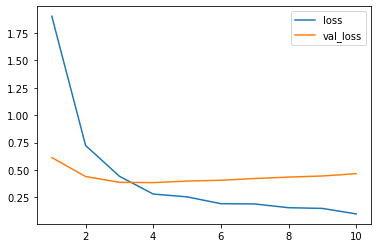

In [54]:
ec = range(1, len(hy.history['accuracy']) + 1)
plt.plot(ec, hy.history['loss'], label = 'loss')
plt.plot(ec, hy.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()